### Bank Marketing Data Set

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing   

The data is related with direct marketing campaigns of a Portuguese banking institution.   
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required,   
in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

### __1__. Imports

In [1]:
import pandas as pd
import numpy as np
import itertools
import datetime
import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
matplotlib.rcParams.update({'font.size': 12})
matplotlib.rcParams.update({'figure.figsize': (12,6)})
matplotlib.rcParams["axes.grid"] = True

In [2]:
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.set_palette('muted')

In [3]:
from catboost import CatBoostClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, auc, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

### __2__. Data Loading and Analysis

In [4]:
df = pd.read_csv(r"./data/bank-full.csv", sep=';')
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
# Целевая переменная
df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
# Обзор объектных признаков
for cat_colname in df.select_dtypes(include='object').columns:
    print(str(cat_colname) + '\n' + '=' * 20 + '\n' + str(df[cat_colname].value_counts()) + '\n' + '*' * 40 + '\n')

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
****************************************

marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
****************************************

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
****************************************

default
no     44396
yes      815
Name: default, dtype: int64
****************************************

housing
yes    25130
no     20081
Name: housing, dtype: int64
****************************************

loan
no     37967
yes     7244
Name: loan, dtype: int64
****************************************

contact
cellular     29285
unknown      13020
telephone     2906
Name:

In [9]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


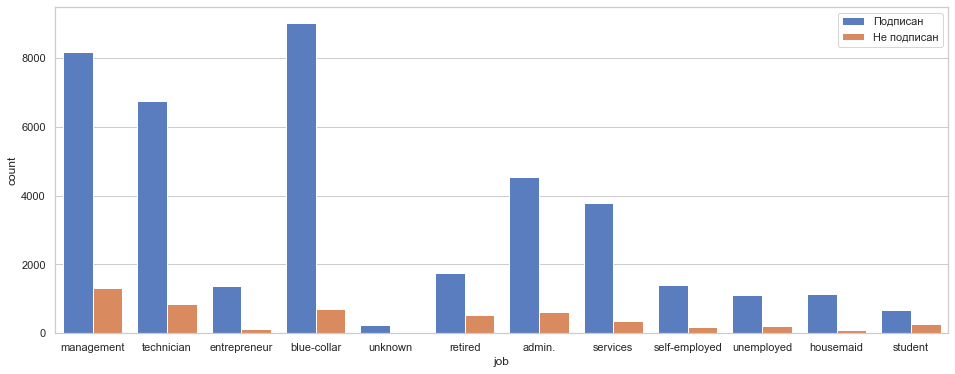

In [10]:
# Соотношение Подписан/Не подписан по Виду Работы
matplotlib.rcParams.update({'figure.figsize': (16,6)})
labels = ["Подписан", "Не подписан"]
ax = sns.countplot(x="job", hue="y", data=df)
ax.legend(labels)

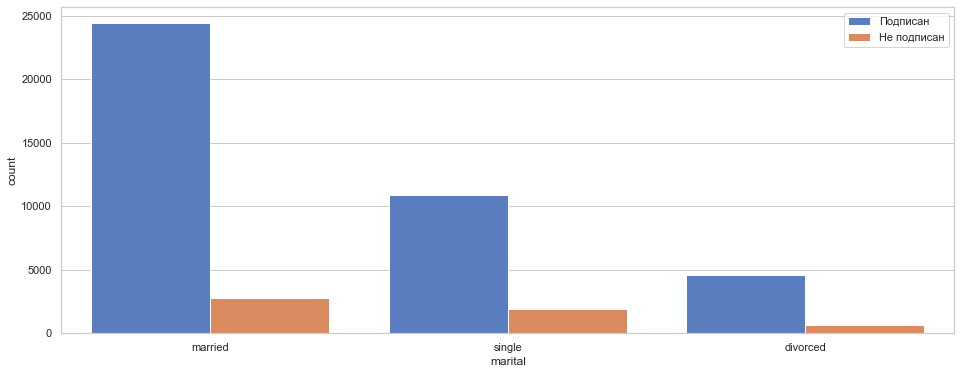

In [11]:
# Соотношение Подписан/Не подписан по Семейному положению
matplotlib.rcParams.update({'figure.figsize': (16,6)})
labels = ["Подписан", "Не подписан"]
ax = sns.countplot(x="marital", hue="y", data=df)
ax.legend(labels)

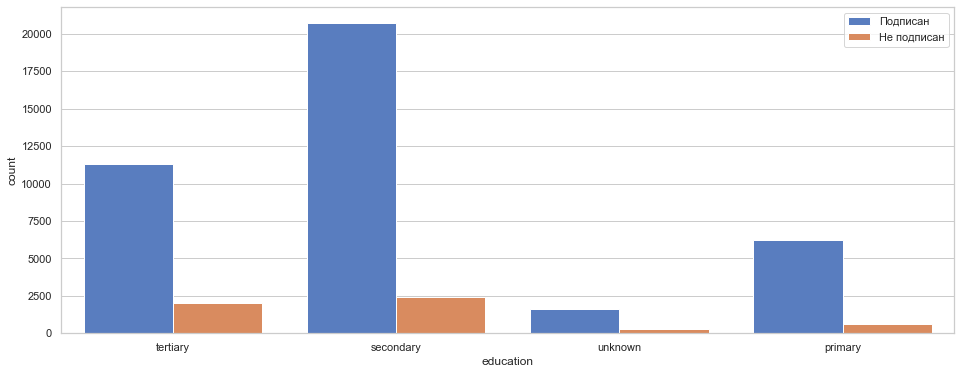

In [12]:
# Соотношение Подписан/Не подписан по Уровню образования
matplotlib.rcParams.update({'figure.figsize': (16,6)})
labels = ["Подписан", "Не подписан"]
ax = sns.countplot(x="education", hue="y", data=df)
ax.legend(labels)

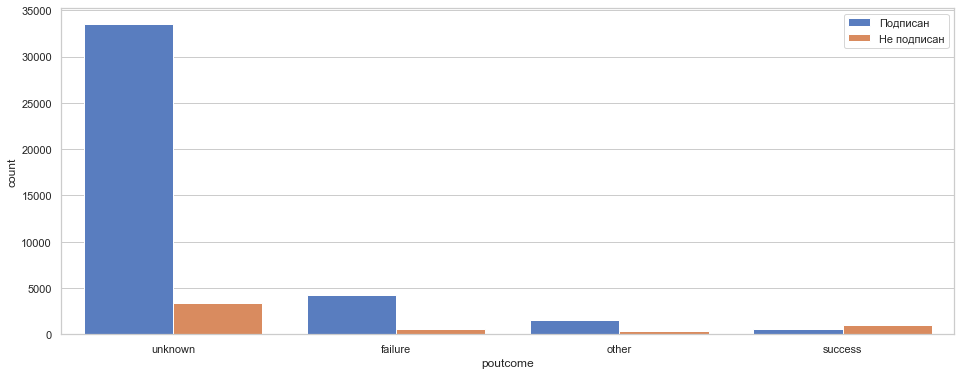

In [13]:
# Соотношение Подписан/Не подписан по Результам предыдущей маркетинговой кампании
matplotlib.rcParams.update({'figure.figsize': (16,6)})
labels = ["Подписан", "Не подписан"]
ax = sns.countplot(x="poutcome", hue="y", data=df)
ax.legend(labels)

In [14]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

In [15]:
df.columns[:-1]

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [16]:
df.loc[df['balance'] >= 25000]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
446,39,technician,single,unknown,no,45248,yes,no,unknown,6,may,1623,1,-1,0,unknown,yes
920,44,admin.,married,secondary,no,58544,yes,no,unknown,7,may,144,2,-1,0,unknown,no
2554,28,technician,single,secondary,no,26765,no,no,unknown,13,may,210,8,-1,0,unknown,no
2619,44,services,married,secondary,no,29312,no,no,unknown,13,may,226,1,-1,0,unknown,no
2778,45,management,married,tertiary,no,37378,yes,no,unknown,14,may,167,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43953,71,retired,married,secondary,no,29941,no,no,telephone,18,jun,80,1,71,3,other,no
44050,74,retired,divorced,primary,no,29080,no,no,cellular,30,jun,301,5,93,4,other,yes
44232,45,management,married,tertiary,no,31472,no,no,cellular,19,jul,568,7,-1,0,unknown,yes
44521,42,management,married,tertiary,no,27696,no,no,cellular,11,aug,370,1,91,7,success,yes


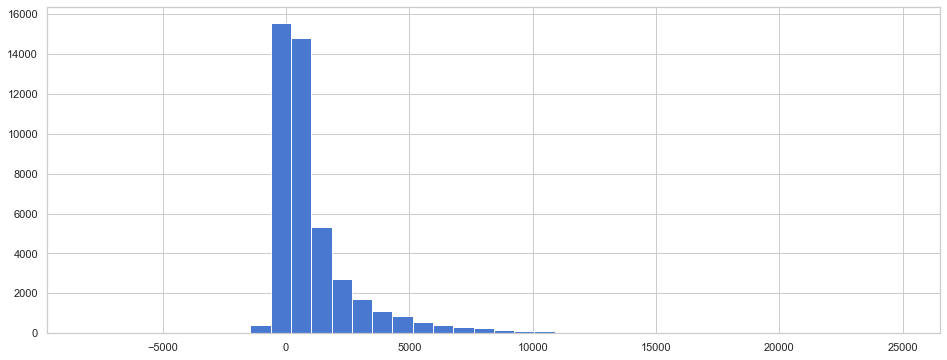

In [17]:
# Баланс
df.loc[df['balance'] < 25000].balance.hist(bins=40)

In [18]:
# Добавим признак неудачной предыдущей маркетинговой компании
df.insert(15,'failure', 0)

In [19]:
df.loc[df['poutcome'] == 'failure', 'failure'] = 1

In [20]:
df.failure.value_counts()

0    40310
1     4901
Name: failure, dtype: int64

__Duration__: last contact duration, in seconds (numeric).   
Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no').   
Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known.   
Thus, this input should only be included for benchmark purposes and should be discarded if the intention    
is to have a realistic predictive model.

In [21]:
df = df.drop('duration', axis=1)

In [22]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [23]:
select = df.select_dtypes(include='object').columns
CAT_FEATURE_NAMES = select
for colname in CAT_FEATURE_NAMES:
    df[colname] = pd.Categorical(df[colname])
    
df[CAT_FEATURE_NAMES].dtypes

job          category
marital      category
education    category
default      category
housing      category
loan         category
contact      category
month        category
poutcome     category
dtype: object

In [24]:
# Целевая переменная
df.y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [25]:
# Подготовим данные для модели
X = df.loc[:,df.columns != 'y']
y = df.loc[:,df.columns == 'y'].to_numpy()

In [26]:
# Разделим на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [27]:
model_catb = CatBoostClassifier(iterations=400, max_depth=3, class_weights={0: 1, 1: 7.5}, eval_metric='F1',
                                verbose=100, random_state=42, use_best_model=True)

In [28]:
model_catb.fit(X_train, y_train, CAT_FEATURE_NAMES, eval_set=(X_test, y_test))

Learning rate set to 0.112719
0:	learn: 0.6495693	test: 0.6506114	best: 0.6506114 (0)	total: 282ms	remaining: 1m 52s
100:	learn: 0.7054097	test: 0.6999836	best: 0.6999836 (100)	total: 4.06s	remaining: 12s
200:	learn: 0.7175826	test: 0.7028289	best: 0.7070126 (131)	total: 7.46s	remaining: 7.39s
300:	learn: 0.7226828	test: 0.7030543	best: 0.7070126 (131)	total: 11.1s	remaining: 3.67s
399:	learn: 0.7280675	test: 0.7029185	best: 0.7070126 (131)	total: 14.8s	remaining: 0us

bestTest = 0.7070126458
bestIteration = 131

Shrink model to first 132 iterations.


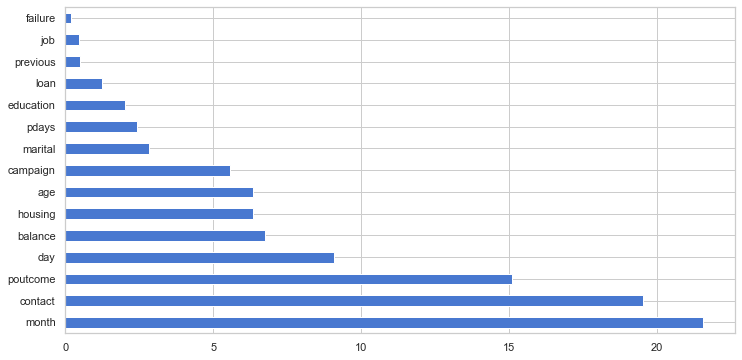

In [29]:
# Выведем график 15-ти наиболее важных признаков (относительно целевого "y")
matplotlib.rcParams.update({'figure.figsize': (12,6)})
feat_importances = pd.Series(model_catb.get_feature_importance(), index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [30]:
def show_proba_calibration_plots(y_predicted_probs, y_true_labels):
    preds_with_true_labels = np.array(list(zip(y_predicted_probs, y_true_labels)))

    thresholds = []
    precisions = []
    recalls = []
    f1_scores = []

    for threshold in np.linspace(0.1, 0.8, 15):
        thresholds.append(threshold)
        precisions.append(precision_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        recalls.append(recall_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        f1_scores.append(f1_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))

    scores_table = pd.DataFrame({'f1':f1_scores,
                                 'precision':precisions,
                                 'recall':recalls,
                                 'probability':thresholds}).sort_values('f1', ascending=False).round(3)
  
    figure = plt.figure(figsize = (15, 5))

    plt1 = figure.add_subplot(121)
    plt1.plot(thresholds, precisions, label='Precision', linewidth=4)
    plt1.plot(thresholds, recalls, label='Recall', linewidth=4)
    plt1.plot(thresholds, f1_scores, label='F1', linewidth=4)
    plt1.set_ylabel('Scores')
    plt1.set_xlabel('Probability threshold')
    plt1.set_title('Probabilities threshold calibration')
    plt1.legend(bbox_to_anchor=(0.25, 0.25))   
    plt1.table(cellText = scores_table.values,
               colLabels = scores_table.columns, 
               colLoc = 'center', cellLoc = 'center', loc = 'bottom', bbox = [0, -1.3, 1, 1])

    plt2 = figure.add_subplot(122)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 0][:, 0], 
              label='Another class', color='royalblue', alpha=1)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 1][:, 0], 
              label='Main class', color='darkcyan', alpha=0.8)
    plt2.set_ylabel('Number of examples')
    plt2.set_xlabel('Probabilities')
    plt2.set_title('Probability histogram')
    plt2.legend(bbox_to_anchor=(1, 1))

    plt.show()

In [31]:
y_pred = model_catb.predict(X_test)
y_pred_probs = model_catb.predict_proba(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      9950
           1       0.34      0.64      0.44      1353

    accuracy                           0.81     11303
   macro avg       0.64      0.73      0.66     11303
weighted avg       0.87      0.81      0.83     11303



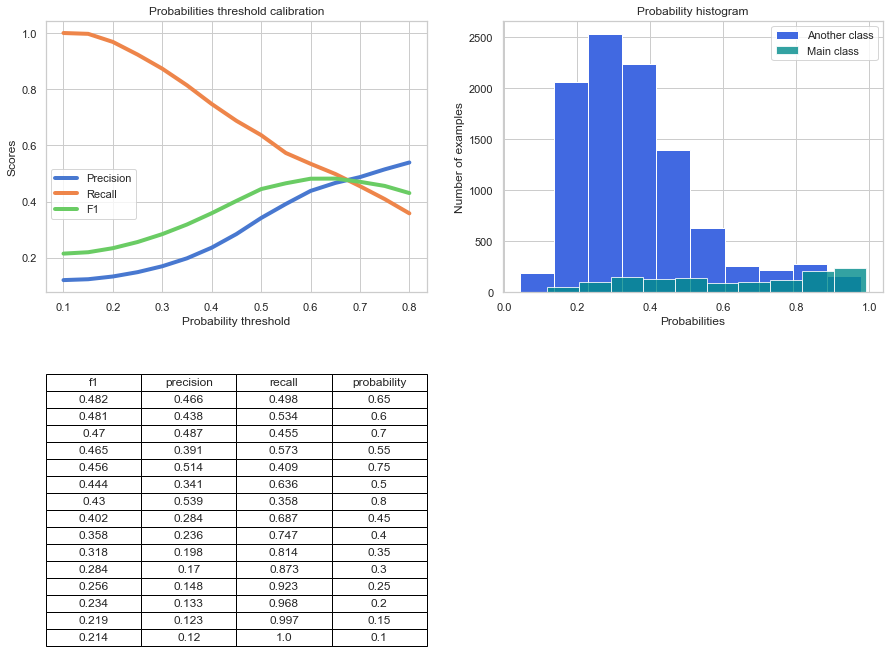

In [32]:
show_proba_calibration_plots(y_pred_probs[:, 1], y_test)

In [33]:
def calc_pred(x):
    return np.array([1 if x >= 0.65 else 0 for x in x])

In [34]:
y_pred_ = calc_pred(y_pred_probs[:, 1])

In [35]:
print(classification_report(y_test, y_pred_))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      9950
           1       0.47      0.50      0.48      1353

    accuracy                           0.87     11303
   macro avg       0.70      0.71      0.70     11303
weighted avg       0.88      0.87      0.87     11303



In [36]:
models_results = {
    'process': [],
    'precision': [],
    'recall': [],
    'f1': [],
    'roc': [],
    'acc': [],
}

In [37]:
print('Classification results:')
prc = precision_score(y_test, y_pred_, average='binary')
print("Precision: %.2f%%" % (prc * 100.0)) 
rec = recall_score(y_test, y_pred_, average='binary')
print("Recall: %.2f%%" % (rec * 100.0)) 
f1 = f1_score(y_test, y_pred_)
print("F1: %.2f%%" % (f1 * 100.0)) 
roc = roc_auc_score(y_test, y_pred_)
print("ROC-AUC: %.2f%%" % (roc * 100.0))
acc = accuracy_score(y_test, y_pred_)
print("Accuracy: %.2f%%" % (acc * 100.0))

Classification results:
Precision: 46.61%
Recall: 49.82%
F1: 48.16%
ROC-AUC: 71.03%
Accuracy: 87.16%


In [38]:
models_results['process'].append('CatBoost')
models_results['precision'].append(prc)
models_results['recall'].append(rec)
models_results['f1'].append(f1)
models_results['roc'].append(roc)
models_results['acc'].append(acc)

### PU learning

In [39]:
# Keep aside 25% of the positives -- they will be the only labeled samples
mod_data = df.copy()
#get the indices of the positives samples
pos_ind = np.where(mod_data.iloc[:,-1].values == 1)[0]
#shuffle them
np.random.shuffle(pos_ind)
# leave just 25% of the positives marked
pos_sample_len = int(np.ceil(0.25 * len(pos_ind)))
print(f'Using {pos_sample_len}/{len(pos_ind)} as positives and unlabeling the rest')
pos_sample = pos_ind[:pos_sample_len]

Using 1323/5289 as positives and unlabeling the rest


In [40]:
mod_data['class_test'] = -1
mod_data.loc[pos_sample,'class_test'] = 1
print('Target variable:\n', mod_data.iloc[:,-1].value_counts())

Target variable:
 -1    43888
 1     1323
Name: class_test, dtype: int64


In [41]:
mod_data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,failure,poutcome,y,class_test
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,0,unknown,0,-1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,0,unknown,0,-1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,0,unknown,0,-1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,0,unknown,0,-1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,0,unknown,0,-1
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,1,-1,0,0,unknown,0,-1
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,1,-1,0,0,unknown,0,-1
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,1,-1,0,0,unknown,0,-1
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,1,-1,0,0,unknown,0,-1
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,1,-1,0,0,unknown,0,-1


In [42]:
# [:-2] is the original class label for positive and negative data   
# [:-1] is the new class for positive and unlabeled data
x_data    = mod_data.iloc[:,:-2].values # just the X 
y_labeled = mod_data.iloc[:,-1].values # new class (just the P & U)
y_positive= mod_data.iloc[:,-2].values # original class

In [43]:
# Random negative sampling
mod_data   = mod_data.sample(frac=1)
neg_sample = mod_data[mod_data['class_test']==-1][:len(mod_data[mod_data['class_test']==1])]
sample_test= mod_data[mod_data['class_test']==-1][len(mod_data[mod_data['class_test']==1]):]
pos_sample = mod_data[mod_data['class_test']==1]
print(neg_sample.shape, pos_sample.shape)
sample_train = pd.concat([neg_sample, pos_sample]).sample(frac=1)

(1323, 18) (1323, 18)


In [44]:
sample_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,failure,poutcome,y,class_test
7861,32,blue-collar,single,secondary,no,1036,yes,yes,unknown,30,may,2,-1,0,0,unknown,0,-1
13576,47,services,married,secondary,no,0,yes,no,cellular,9,jul,1,-1,0,0,unknown,0,-1
17991,35,services,married,secondary,no,5,no,no,cellular,30,jul,2,-1,0,0,unknown,0,-1
41278,36,management,married,tertiary,no,255,no,no,cellular,25,aug,6,95,4,0,success,1,1
38751,22,services,single,secondary,no,250,yes,no,cellular,18,may,3,-1,0,0,unknown,0,-1


In [45]:
model_catb = CatBoostClassifier(iterations=400, max_depth=3, eval_metric='F1',
                                verbose=100, random_state=42)

In [46]:
model_catb.fit(sample_train.iloc[:,:-2], sample_train.iloc[:,-2], CAT_FEATURE_NAMES)

Learning rate set to 0.036165
0:	learn: 0.7397718	total: 27ms	remaining: 10.8s
100:	learn: 0.7459207	total: 785ms	remaining: 2.32s
200:	learn: 0.7561885	total: 1.7s	remaining: 1.68s
300:	learn: 0.7613169	total: 2.61s	remaining: 859ms
399:	learn: 0.7718934	total: 3.52s	remaining: 0us


In [47]:
x_test = sample_test.iloc[:,:-2].values
y_pred_= model_catb.predict(x_test)

In [48]:
y_test = sample_test.iloc[:,-2].values

In [49]:
print(classification_report(y_test, y_pred_))

              precision    recall  f1-score   support

           0       0.96      0.68      0.80     38742
           1       0.18      0.73      0.29      3823

    accuracy                           0.68     42565
   macro avg       0.57      0.70      0.54     42565
weighted avg       0.89      0.68      0.75     42565



In [50]:
prc = precision_score(y_test, y_pred_, average='binary')
rec = recall_score(y_test, y_pred_, average='binary')
f1 = f1_score(y_test, y_pred_)
roc = roc_auc_score(y_test, y_pred_)
acc = accuracy_score(y_test, y_pred_)

In [51]:
models_results['process'].append('RN sampling')
models_results['precision'].append(prc)
models_results['recall'].append(rec)
models_results['f1'].append(f1)
models_results['roc'].append(roc)
models_results['acc'].append(acc)

In [52]:
pd.DataFrame(data=models_results).sort_values('f1', ascending=False)

,process,precision,recall,f1,roc,acc
0,CatBoost,0.466113,0.498152,0.481601,0.710282,0.871627
1,RN sampling,0.182449,0.728747,0.291835,0.703256,0.682345
